## Logistical Regression 

Logistic Regression 
- Term "Regression" is a bad name for this, i dont think it has anything to do w/ <i>regression</i>
- this is used to classify data in machine lerning - ie, figure out patterns or classify things like:
    - is email spam (based on features like word counts, word frequency, etc as feature vectors
    - is a song from author Lady Gaga or Clash based on word frequencies
- Term "Logistic" = due to logistic function or sigmoid function to keep values between 0-1

![sigmoid](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png)


- Idea is similar to Linear Regression, formalizing terminology better:
    - Given n features and m training examples
    - Given your features X<sup>1</sup>..X<sup>n</sup>
    - Given your weights/parameters O<sup>1</sup>..O<sup>n</sup> - I use O instead of Theta since I don't know greek
    - Given the training set X<sub>1</sub>..X<sub>m</sub>
    - Given a hypothesis h<sup>O</sup>(x) encompassing your O-weights and X-features
        - like:  h<sub>O</sub>(x) = O<sup>0</sup> + O<sup>1</sup>X<sup>1</sup> + O<sup>2</sup>X<sup>2</sup> + O<sup>n</sup>X<sup>n</sup>
    - Wrap the h inside the sigmoid function
\begin{equation*}
z = \frac{1}{(1-e^h)}
\end{equation*}
    - Use the cost function C(O) = Y * (-log(h<sub>O</sub>(x))) + (1-Y)(log(h<sub>O</sub>(x)))
    - Intuition with using -log(x) and log(x) as cost input to sigmoid is visible by viewing plots:




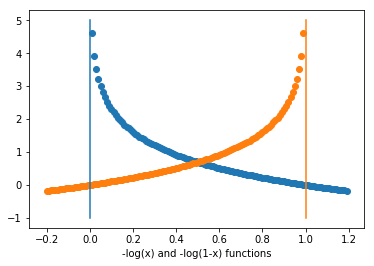

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import math

# here males will be plotted as blue and femals as orange
xs = range(1,120)
xs = [x / 100.0 for x in xs]
ys = [-math.log(x) for x in xs]
plt.scatter(xs, ys)

xs = range(-20,100)
xs = [x / 100.0 for x in xs]
ys = [-math.log(1-x) for x in xs]
plt.xlabel('-log(x) and -log(1-x) functions')
plt.scatter(xs, ys)

plt.plot([0,0],[-1,5])
plt.plot([1,1],[-1,5])

- Looking cost function - if Y=1, the cost function evaluates to 1 * (-log(h<sub>O</sub>(x))) - or the blue line. 
- For each X<super>n</super> training example where expect Y=1:
    - if x is large, h(x) is 0 (or <0).  Or has 0 cost.   
    - If x is small (or close to 0), the cost skyrockets to be very large (infinity)
- Conversely if expect Y = 0, wrong answers have super high cost, right predictions have 0 cost.  
<i>I'm not sure I get it, but I guess you would never have a wrong guess of 0 or 1 when expecting 1 or 0 ??</i>

### Gradient Descent 

Again use GD to solve for O in example  
- hypothesis:  h<sub>O</sub>(x) = O<sup>0</sup> + O<sup>1</sup>X<sup>1</sup> + O<sup>2</sup>X<sup>2</sup> + O<sup>n</sup>X<sup>n</sup>  
- cost function:  C(O) = Y * (-log(h<sub>O</sub>(x))) + (1-Y)(log(h<sub>O</sub>(x)))
- As before, GD loop:
    - O<sub>j</sub> = O<sub>j</sub> - learningRate * partialDeriv(C(O))
    - for each O parameter 
- Until C(O) is minimized

I need to update my grad_solver to solve for a new f function and e cost, otherwise it can work the same.  (I should update it to take in an arbitrary function (h) and vector of O weights but that is TBD.



In [ ]:
# solver for logistic regression
def grad_descent3(testData):
    guessA = guessB = 1.0   #initial guess y=1x+1

    stepA = 0.00000005   #dif step for diff A,B ?
    stepB = 0.25         #maybe normalize data first
    step_limit = 0.0001  # when to stop, when cost stops changing
    loop_limit = 5       # arbitrary max limits
    costChange = 1.0

    A,B,x,y = sp.symbols('A B x y')
    f = A*x + B  # linear func y=mx+b
    e = (f - y)**2  # error squared
    print ('init guess A: %f, B: %f'%(guessA,guessB))
    print ('init func: %s, test size: %d' %(str(f),testData.shape[0]))
    
    costF = evalSumF(e,x,y,testData)  # cost fun evaluted for testData
    print('init costF',str(costF)[:80])
    costEval = costF.subs(A,guessA).subs(B,guessB)  # cost evaluted for A B guess
    print('init cost',costEval)

    i=0  
    while (abs(costChange) > step_limit and i<loop_limit):  # arbitrary limiter
        pda = evalPartialDeriv(e,x,y,testData,A,guessA,B,guessB)
        pdb = evalPartialDeriv(e,x,y,testData,B,guessB,A,guessA)
        guessA = guessA - stepA * pda
        guessB = guessB - stepB * pdb
        previousCost = costEval
        costEval = costF.subs(A,guessA).subs(B,guessB)
        costChange = previousCost-costEval
        print ('i=%d,cost=%d,A=%f,B=%f'%(i, int(costEval), guessA, guessB))
        i=i+1
    return guessA,guessB